<a href="https://colab.research.google.com/github/ayushm-agrawal/ml-algorithms-numpy/blob/master/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Imports

In [0]:
import pandas as pd
import sklearn
import numpy as np
np.seterr(divide='ignore', invalid='ignore')
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
# from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, roc_curve,classification_report

### Mount Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
root = 'gdrive/My Drive/DeepLearning/MNIST'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


#### Print GPU Info

In [3]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime → "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Thu Feb 20 23:00:41 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.48.02    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [4]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('To enable a high-RAM runtime, select the Runtime → "Change runtime type"')
  print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
  print('re-execute this cell.')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.4 gigabytes of available RAM

You are using a high-RAM runtime!


### Load Data

In [5]:
train_data = np.load('/content/gdrive/My Drive/DeepLearning/MNIST/mnist_train_images.npy')
train_labels = np.load('/content/gdrive/My Drive/DeepLearning/MNIST/mnist_train_labels.npy')

test_data = np.load('/content/gdrive/My Drive/DeepLearning/MNIST/mnist_test_images.npy')
test_labels = np.load('/content/gdrive/My Drive/DeepLearning/MNIST/mnist_test_labels.npy')
print("Train Data: {}... \tTrain Labels: {}...".format(train_data.shape, train_labels.shape))
print("Test Data: {}... \tTest Labels: {}...".format(test_data.shape, test_labels.shape))

Train Data: (55000, 784)... 	Train Labels: (55000, 10)...
Test Data: (10000, 784)... 	Test Labels: (10000, 10)...


### Metrics

In [0]:
class Metrics:

  def __init__(self, X, y):
    self.X = X
    self.y = y
    self.n_samples = len(y)

  def cost(self, params):
    '''
      Half squared mean error
      Returns:
        cost of the current step
    '''
    hypothesis = self.X @ params
    cost = 1/(2*self.n_samples)* np.sum(hypothesis - self.y)**2

    return cost
  
  def gradient_descent(self, params, learn_rate, n_iters):
    ''' 
    Calculates the gradient descent algorithm
    to minimize the cost
    Args:
      learn_rate - how big steps to take while minimizing the cost
      n_iters  - number of iterations for gradient descent
    Returns:
      cost_history - numpy ndarray of updated cost value after each iteration
      params - updated parameters after minimizing the cost
    '''
    cost_history = np.zeros((n_iters, 1))
    print("Number of Iterations: {}".format(n_iters))
    for i in range(n_iters):
      print("Current iter: {}".format(i+1), end="\r")
      params = params - (learn_rate/self.n_samples) * self.X.T @ (self.X @ params - self.y)
      cost_history[i] = self.cost(params)
    print("")
    return (cost_history, params)

### Linear Regression

In [0]:
class MyLinearRegression:
  def __init__(self, X, y, learn_rate=0.03, n_iters=1500):

    self.learn_rate = learn_rate
    self.n_iter = n_iters
    self.n_samples = len(y)
    # self.X = np.hstack((np.ones(
    #         (self.n_samples, 1)), (X - np.mean(X, 0)) / np.std(X, 0)))
    # self.y = y[:, np.newaxis]
    self.X = np.hstack((np.ones((self.n_samples, 1)), X))
    self.y = y
    self.n_features = np.size(X, 1)
    self.classes = np.size(y, 1)
    # self.params = np.zeros((self.n_features + 1, 1))
    # self.coef_ = None
    # self.intercept_ = None

  def fit(self):
    print("Number of Iterations: {}".format(self.n_iter))
    print("Features.shape: {}".format(self.X.shape))
    print("Labels shape: {}".format(self.y.shape))
    print("Number of features: {}".format(self.n_features))
    params = np.zeros((self.n_features + 1, self.classes))
    print("Params shape: {}".format(params.shape))
    for i in range(self.n_iter):
      print("Current iteration: {}".format(i+1), end="\r")
      params = params - (self.learn_rate/self.n_samples) * self.X.T @ (self.X @ params - self.y)
      # print("Params: {}".format(self.params), end="\r")
    # self.intercept_ = self.params[0]
    # self.coef_ = self.params[1:]
    
    return params

  def score(self, params, X=None, y=None):

    if X is None:
      X = self.X
    else:
      n_samples = np.size(X,0)
      X = np.hstack((np.ones((n_samples, 1)), X))
    
    if y is None:
      y = self.y
    # else:
    #   y = y[:, np.newaxis]

    y_pred = X @ params
    score = 1 - (((y-y_pred)**2).sum() / ((y-y.mean())**2).sum())

    return score

  def predict(self, params):
    n_samples = np.size(self.X, 0)
    y = self.X @ params
    return y

  def get_params(self):

    return self.params

### Normalize Data

In [8]:
# utilizing SK-Learn to normalize the data before passing it through the gradient descent function
X_sk = normalize(train_data, norm='l2', axis=1, copy=True, return_norm=False)
y_sk = train_labels
print(X_sk.shape)
print(y_sk.shape)

(55000, 784)
(55000, 10)


### Running Gradient Descent

Initial Cost: 27500.0
Number of Iterations: 1500

Optimal parameters are: 
 [[0.07917581 0.1191234  0.07171404 ... 0.09211563 0.02821782 0.05442129]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]] 

Final cost is:  [0.04549526]


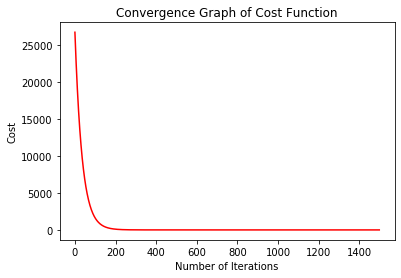

In [9]:
n_iters = 1500
learning_rate = 0.01
X_sk = np.hstack((np.ones((len(y_sk),1)), X_sk))

params = np.zeros((np.size(X_sk, 1), 1))
metrics = Metrics(X_sk, y_sk)
init_cost = metrics.cost(params)

print("Initial Cost: {}".format(init_cost))

(cost_history, params) = metrics.gradient_descent(params, learning_rate, n_iters)

print("Optimal parameters are: \n", params, "\n")

print("Final cost is: ", cost_history[-1])

plt.plot(range(len(cost_history)), cost_history, 'r')

plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

### Comparing with SK-Learn Models

In [10]:

X_sk = normalize(train_data, norm='l2', axis=1, copy=True, return_norm=False)
y_sk = train_labels
lr = MyLinearRegression(X_sk, y_sk, learn_rate=0.03, n_iters=1500)
optimal_params = lr.fit()
print("Optimal Params: \n{}\n".format(optimal_params))
sk_learn_lr = LinearRegression().fit(X_sk, y_sk)

accuracy_train = lr.score(optimal_params)
sk_accuracy_train = sk_learn_lr.score(X_sk, y_sk)
print("Train accuracy: {}\n".format(accuracy_train))

X_test = normalize(test_data, norm='l2', axis=1, copy=True, return_norm=False)
y_test = test_labels

accuracy_test = lr.score(optimal_params, X = X_test, y = y_test)
print("Test Acccuracy: {}\n".format(accuracy_test))
sk_accuracy_test = sk_learn_lr.score(X_test, y_test)
print("\n\n")
pd.DataFrame([[accuracy_train, sk_accuracy_train],
              [accuracy_test, sk_accuracy_test]],
             ['Training Accuracy', 'Test Accuracy'],    
             ['Our Implementation', 'Sklearn\'s Implementation'])

Number of Iterations: 1500
Features.shape: (55000, 785)
Labels shape: (55000, 10)
Number of features: 784
Params shape: (785, 10)
Optimal Params: 
[[0.07917581 0.1191234  0.07171404 ... 0.09211563 0.02821782 0.05442129]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]

Train accuracy: 0.26072651895122234

Test Acccuracy: 0.2643806455082093






/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multi

,Our Implementation,Sklearn's Implementation
Training Accuracy,0.260727,0.595065
Test Accuracy,0.264381,0.590740


In [11]:
y_pred = lr.predict(optimal_params)
print(sklearn.metrics.r2_score(y_sk, y_pred))

0.25654301128603035
